In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:

data = pd.read_csv("continuous_factory_process.csv")


print(data.head())
print(data.shape)  


            time_stamp  AmbientConditions.AmbientHumidity.U.Actual  \
0  2019-03-06 10:52:33                                       17.24   
1  2019-03-06 10:52:34                                       17.24   
2  2019-03-06 10:52:35                                       17.24   
3  2019-03-06 10:52:36                                       17.24   
4  2019-03-06 10:52:37                                       17.24   

   AmbientConditions.AmbientTemperature.U.Actual  \
0                                          23.53   
1                                          23.53   
2                                          23.53   
3                                          23.53   
4                                          23.53   

   Machine1.RawMaterial.Property1  Machine1.RawMaterial.Property2  \
0                           11.54                             200   
1                           11.54                             200   
2                           11.54                          

In [3]:
data.isnull().sum()

time_stamp                                       0
AmbientConditions.AmbientHumidity.U.Actual       0
AmbientConditions.AmbientTemperature.U.Actual    0
Machine1.RawMaterial.Property1                   0
Machine1.RawMaterial.Property2                   0
                                                ..
Stage2.Output.Measurement12.U.Setpoint           0
Stage2.Output.Measurement13.U.Actual             0
Stage2.Output.Measurement13.U.Setpoint           0
Stage2.Output.Measurement14.U.Actual             0
Stage2.Output.Measurement14.U.Setpoint           0
Length: 116, dtype: int64

In [4]:
data.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
count,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,...,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,14088.000000,1.408800e+04
mean,15.330759,23.843635,11.851256,205.676320,951.679815,248.868896,1242.764276,72.013330,72.013106,70.333111,...,7.535958e+00,7.930000e+00,5.416515e+00,5.650000e+00,1.972561e+00,1.850000e+00,3.535251e+00,2.890000e+00,7.515574,1.171000e+01
std,1.188993,0.373535,0.510309,11.606324,126.662010,3.297820,95.845946,0.063183,0.406313,5.525217,...,1.645785e+00,2.730357e-12,1.182333e+00,1.820830e-13,4.145398e-01,3.790436e-13,4.768244e-01,4.361111e-13,2.082948,5.666779e-13
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,...,-5.220420e-95,7.930000e+00,-2.703210e-95,5.650000e+00,-6.200020e-96,1.850000e+00,-1.822810e-95,2.890000e+00,-3.437021,1.171000e+01
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,68.880000,...,7.840000e+00,7.930000e+00,5.560000e+00,5.650000e+00,2.030000e+00,1.850000e+00,3.450000e+00,2.890000e+00,7.720000,1.171000e+01
50%,15.120000,23.930000,11.540000,200.000000,963.000000,247.000000,1264.440000,72.000000,72.000000,71.980000,...,7.900000e+00,7.930000e+00,5.630000e+00,5.650000e+00,2.060000e+00,1.850000e+00,3.510000e+00,2.890000e+00,7.870000,1.171000e+01
75%,16.630000,24.160000,12.220000,201.000000,1027.430000,251.000000,1273.460000,72.000000,72.400000,72.920000,...,7.950000e+00,7.930000e+00,5.800000e+00,5.650000e+00,2.090000e+00,1.850000e+00,3.760000e+00,2.890000e+00,8.080000,1.171000e+01
max,17.240000,24.430000,12.900000,236.000000,1048.060000,257.000000,1331.820000,72.500000,72.700000,88.530000,...,8.590000e+00,7.930000e+00,6.320000e+00,5.650000e+00,5.200000e+00,1.850000e+00,8.000000e+00,2.890000e+00,14.260000,1.171000e+01


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = data.drop(columns=['time_stamp'])
data.isnull().sum() 
data = data.dropna()  


X = data.drop(columns=['Stage1.Output.Measurement0.U.Actual','Stage1.Output.Measurement0.U.Setpoint','Stage1.Output.Measurement1.U.Actual','Stage1.Output.Measurement1.U.Setpoint','Stage1.Output.Measurement2.U.Actual','Stage1.Output.Measurement2.U.Setpoint','Stage1.Output.Measurement3.U.Actual','Stage1.Output.Measurement3.U.Setpoint','Stage1.Output.Measurement4.U.Actual','Stage1.Output.Measurement4.U.Setpoint','Stage1.Output.Measurement5.U.Actual','Stage1.Output.Measurement5.U.Setpoint','Stage1.Output.Measurement6.U.Actual','Stage1.Output.Measurement6.U.Setpoint','Stage1.Output.Measurement7.U.Actual','Stage1.Output.Measurement7.U.Setpoint','Stage1.Output.Measurement8.U.Actual','Stage1.Output.Measurement8.U.Setpoint','Stage1.Output.Measurement9.U.Actual','Stage1.Output.Measurement9.U.Setpoint','Stage1.Output.Measurement10.U.Actual','Stage1.Output.Measurement10.U.Setpoint','Stage1.Output.Measurement11.U.Actual','Stage1.Output.Measurement11.U.Setpoint','Stage1.Output.Measurement12.U.Actual','Stage1.Output.Measurement12.U.Setpoint','Stage1.Output.Measurement13.U.Actual','Stage1.Output.Measurement13.U.Setpoint','Stage1.Output.Measurement14.U.Actual','Stage1.Output.Measurement14.U.Setpoint',
'Machine4.Temperature1.C.Actual','Machine4.Temperature2.C.Actual','Machine4.Pressure.C.Actual','Machine4.Temperature3.C.Actual','Machine4.Temperature4.C.Actual','Machine4.Temperature5.C.Actual','Machine4.ExitTemperature.U.Actual','Machine5.Temperature1.C.Actual','Machine5.Temperature2.C.Actual','Machine5.Temperature3.C.Actual','Machine5.Temperature4.C.Actual','Machine5.Temperature5.C.Actual','Machine5.Temperature6.C.Actual','Machine5.ExitTemperature.U.Actual','Stage2.Output.Measurement0.U.Actual','Stage2.Output.Measurement0.U.Setpoint','Stage2.Output.Measurement1.U.Actual','Stage2.Output.Measurement1.U.Setpoint','Stage2.Output.Measurement2.U.Actual','Stage2.Output.Measurement2.U.Setpoint','Stage2.Output.Measurement3.U.Actual','Stage2.Output.Measurement3.U.Setpoint','Stage2.Output.Measurement4.U.Actual','Stage2.Output.Measurement4.U.Setpoint','Stage2.Output.Measurement5.U.Actual','Stage2.Output.Measurement5.U.Setpoint','Stage2.Output.Measurement6.U.Actual','Stage2.Output.Measurement6.U.Setpoint','Stage2.Output.Measurement7.U.Actual','Stage2.Output.Measurement7.U.Setpoint','Stage2.Output.Measurement8.U.Actual','Stage2.Output.Measurement8.U.Setpoint','Stage2.Output.Measurement9.U.Actual','Stage2.Output.Measurement9.U.Setpoint','Stage2.Output.Measurement10.U.Actual','Stage2.Output.Measurement10.U.Setpoint','Stage2.Output.Measurement11.U.Actual','Stage2.Output.Measurement11.U.Setpoint','Stage2.Output.Measurement12.U.Actual','Stage2.Output.Measurement12.U.Setpoint','Stage2.Output.Measurement13.U.Actual','Stage2.Output.Measurement13.U.Setpoint','Stage2.Output.Measurement14.U.Actual','Stage2.Output.Measurement14.U.Setpoint'])
y1 = data['Stage1.Output.Measurement0.U.Actual']
y2 = data['Stage1.Output.Measurement0.U.Setpoint']
y3 = data['Stage1.Output.Measurement1.U.Setpoint']
y4 = data['Stage1.Output.Measurement2.U.Actual']
y5 = data['Stage1.Output.Measurement2.U.Setpoint']

X_train, X_test, y1_train, y1_test,y2_train, y2_test,y3_train, y3_test,y4_train, y4_test,y5_train, y5_test = train_test_split(X, y1,y2,y3,y4,y5, test_size=0.18, random_state=35)


In [6]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor() 


multioutput_regressor = MultiOutputRegressor(rf_regressor)
y_test_combined = np.column_stack((y1_test, y2_test, y3_test, y4_test, y5_test))
y_train_combined = np.column_stack((y1_train, y2_train, y3_train, y4_train, y5_train))

multioutput_regressor.fit(X_train, y_train_combined)
y_pred_combined = multioutput_regressor.predict(X_test)
y_pred = np.hsplit(y_pred_combined, 5)


In [7]:
multioutput_regressor.score(X_test,y_test_combined)

0.8012110767298045

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate ensemble performance
mse = mean_squared_error(y_test_combined, y_pred_combined)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_combined, y_pred_combined)

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.2299990277173011
RMSE: 0.4795821386554144
R-squared: 0.8012110767298045


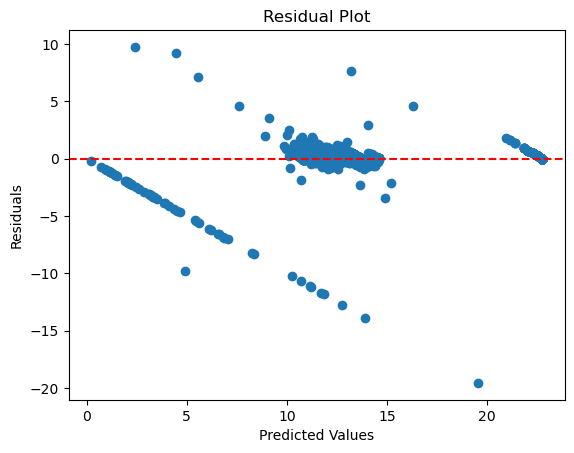

In [9]:
y_test_combined = np.column_stack((y1_test, y2_test, y3_test, y4_test, y5_test))

y_pred_combined = multioutput_regressor.predict(X_test)
y_pred = np.hsplit(y_pred_combined, 5)

residuals = y_test_combined - y_pred_combined
plt.scatter(y_pred_combined, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

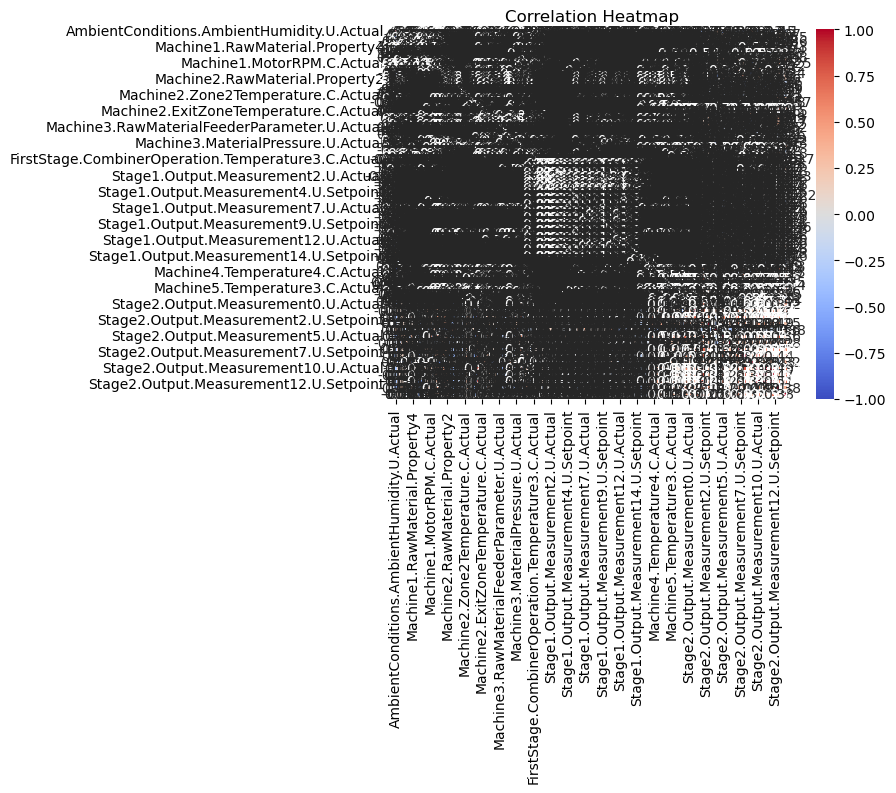

In [10]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
X1 = data.drop(columns=['Machine1.RawMaterial.Property1','Machine1.RawMaterial.Property2','Machine1.RawMaterial.Property3','Machine1.RawMaterial.Property4','Machine1.RawMaterialFeederParameter.U.Actual','Machine1.Zone1Temperature.C.Actual','Machine1.Zone2Temperature.C.Actual','Machine1.MotorAmperage.U.Actual','Machine1.MotorRPM.C.Actual','Machine1.MaterialPressure.U.Actual','Machine1.MaterialTemperature.U.Actual','Machine1.ExitZoneTemperature.C.Actual','Machine2.RawMaterial.Property1','Machine2.RawMaterial.Property2','Machine2.RawMaterial.Property3','Machine2.RawMaterial.Property4','Machine2.RawMaterialFeederParameter.U.Actual','Machine2.Zone1Temperature.C.Actual','Machine2.Zone2Temperature.C.Actual','Machine2.MotorAmperage.U.Actual','Machine2.MotorRPM.C.Actual','Machine2.MaterialPressure.U.Actual','Machine2.MaterialTemperature.U.Actual','Machine2.ExitZoneTemperature.C.Actual','Machine3.RawMaterial.Property1','Machine3.RawMaterial.Property2','Machine3.RawMaterial.Property3','Machine3.RawMaterial.Property4','Machine3.RawMaterialFeederParameter.U.Actual','Machine3.Zone1Temperature.C.Actual','Machine3.Zone2Temperature.C.Actual','Machine3.MotorAmperage.U.Actual','Machine3.MotorRPM.C.Actual','Machine3.MaterialPressure.U.Actual','Machine3.MaterialTemperature.U.Actual','Machine3.ExitZoneTemperature.C.Actual','FirstStage.CombinerOperation.Temperature1.U.Actual','FirstStage.CombinerOperation.Temperature2.U.Actual','FirstStage.CombinerOperation.Temperature3.C.Actual','Stage1.Output.Measurement0.U.Actual','Stage1.Output.Measurement0.U.Setpoint','Stage1.Output.Measurement1.U.Actual','Stage1.Output.Measurement1.U.Setpoint','Stage1.Output.Measurement2.U.Actual','Stage1.Output.Measurement2.U.Setpoint','Stage1.Output.Measurement3.U.Actual','Stage1.Output.Measurement3.U.Setpoint','Stage1.Output.Measurement4.U.Actual','Stage1.Output.Measurement4.U.Setpoint','Stage1.Output.Measurement5.U.Actual','Stage1.Output.Measurement5.U.Setpoint','Stage1.Output.Measurement6.U.Actual','Stage1.Output.Measurement6.U.Setpoint','Stage1.Output.Measurement7.U.Actual','Stage1.Output.Measurement7.U.Setpoint','Stage1.Output.Measurement8.U.Actual','Stage1.Output.Measurement8.U.Setpoint','Stage1.Output.Measurement9.U.Actual','Stage1.Output.Measurement9.U.Setpoint','Stage1.Output.Measurement10.U.Actual','Stage1.Output.Measurement10.U.Setpoint','Stage1.Output.Measurement11.U.Actual','Stage1.Output.Measurement11.U.Setpoint','Stage1.Output.Measurement12.U.Actual','Stage1.Output.Measurement12.U.Setpoint','Stage1.Output.Measurement13.U.Actual','Stage1.Output.Measurement13.U.Setpoint','Stage1.Output.Measurement14.U.Actual','Stage1.Output.Measurement14.U.Setpoint','Stage2.Output.Measurement0.U.Actual','Stage2.Output.Measurement0.U.Setpoint','Stage2.Output.Measurement1.U.Actual','Stage2.Output.Measurement1.U.Setpoint','Stage2.Output.Measurement2.U.Actual','Stage2.Output.Measurement2.U.Setpoint','Stage2.Output.Measurement3.U.Actual','Stage2.Output.Measurement3.U.Setpoint','Stage2.Output.Measurement4.U.Actual','Stage2.Output.Measurement4.U.Setpoint','Stage2.Output.Measurement5.U.Actual','Stage2.Output.Measurement5.U.Setpoint','Stage2.Output.Measurement6.U.Actual','Stage2.Output.Measurement6.U.Setpoint','Stage2.Output.Measurement7.U.Actual','Stage2.Output.Measurement7.U.Setpoint','Stage2.Output.Measurement8.U.Actual','Stage2.Output.Measurement8.U.Setpoint','Stage2.Output.Measurement9.U.Actual','Stage2.Output.Measurement9.U.Setpoint','Stage2.Output.Measurement10.U.Actual','Stage2.Output.Measurement10.U.Setpoint','Stage2.Output.Measurement11.U.Actual','Stage2.Output.Measurement11.U.Setpoint','Stage2.Output.Measurement12.U.Actual','Stage2.Output.Measurement12.U.Setpoint','Stage2.Output.Measurement13.U.Actual','Stage2.Output.Measurement13.U.Setpoint','Stage2.Output.Measurement14.U.Actual','Stage2.Output.Measurement14.U.Setpoint'])

data.isnull().sum() 
data = data.dropna()  

y6 = data['Stage2.Output.Measurement0.U.Setpoint']
y7 = data['Stage2.Output.Measurement1.U.Setpoint']
y8 = data['Stage2.Output.Measurement2.U.Setpoint']
y9 = data['Stage2.Output.Measurement3.U.Setpoint']
y10 = data['Stage2.Output.Measurement4.U.Setpoint']



X1_train,X1_test,y6_train,y6_test,y7_train,y7_test ,y8_train,y8_test ,y9_train,y9_test ,y10_train,y10_test  = train_test_split(X1 , y6,y7,y8,y9,y10 , test_size=0.7,random_state=10)

In [12]:
from sklearn.svm import SVR

svr1 = SVR()
svr2 = SVR()
svr3 = SVR()
svr4 = SVR()
svr5 = SVR()

svr1.fit(X1_train, y6_train)
svr2.fit(X1_train, y7_train)
svr3.fit(X1_train, y8_train)
svr4.fit(X1_train, y9_train)
svr5.fit(X1_train, y10_train)

y6_pred = svr1.predict(X1_test)
y7_pred = svr2.predict(X1_test)
y8_pred = svr3.predict(X1_test)
y9_pred = svr4.predict(X1_test)
y10_pred = svr5.predict(X1_test)


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse1 = mean_squared_error(y6_test, y6_pred)
mae1 = mean_absolute_error(y6_test, y6_pred)
r2_1 = r2_score(y6_test, y6_pred)

mse2 = mean_squared_error(y7_test, y7_pred)
mae2 = mean_absolute_error(y7_test, y7_pred)
r2_2 = r2_score(y7_test, y7_pred)

mse3 = mean_squared_error(y8_test, y8_pred)
mae3 = mean_absolute_error(y8_test, y8_pred)
r2_3 = r2_score(y8_test, y8_pred)

mse4 = mean_squared_error(y9_test, y9_pred)
mae4 = mean_absolute_error(y9_test, y9_pred)
r2_4 = r2_score(y9_test, y9_pred)

mse5 = mean_squared_error(y10_test, y10_pred)
mae5 = mean_absolute_error(y10_test, y10_pred)
r2_5 = r2_score(y10_test, y10_pred)

print("Target Variable 1:")
print("Mean Squared Error:", mse1)
print("Mean Absolute Error:", mae1)
print("R-squared Score:", r2_1)
print()

print("Target Variable 2:")
print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("R-squared Score:", r2_2)
print()

print("Target Variable 3:")
print("Mean Squared Error:", mse3)
print("Mean Absolute Error:", mae3)
print("R-squared Score:", r2_3)
print()

print("Target Variable 4:")
print("Mean Squared Error:", mse4)
print("Mean Absolute Error:", mae4)
print("R-squared Score:", r2_4)
print()

print("Target Variable 5:")
print("Mean Squared Error:", mse5)
print("Mean Absolute Error:", mae5)
print("R-squared Score:", r2_5)
print()

Target Variable 1:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0

Target Variable 2:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0

Target Variable 3:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0

Target Variable 4:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0

Target Variable 5:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared Score: 1.0



In [14]:
rf1_regressor = RandomForestRegressor(n_estimators=100) 

multioutput1_regressor = MultiOutputRegressor(rf1_regressor)
y12_test_combined = np.column_stack((y6_test, y7_test, y8_test, y9_test, y10_test))
y12_train_combined = np.column_stack((y6_train, y7_train, y8_train, y9_train, y10_train))


multioutput1_regressor.fit(X1_train,y12_train_combined)
y12_pred_combined = multioutput1_regressor.predict(X1_test)
y12_pred = np.hsplit(y12_pred_combined, y12_pred_combined.shape[1])






In [15]:
multioutput1_regressor.score(X1_test,y12_test_combined)

0.9905189418293023

In [16]:
array_lengths = [len(X1_train), len(X1_test), len(y6_train), len(y6_test), len(y7_train), len(y7_test), len(y8_train), len(y8_test), len(y9_train), len(y9_test), len(y10_train), len(y10_test)]

if len(set(array_lengths)) != 1:
    print("Found input variables with inconsistent numbers of samples:")
    for i, length in enumerate(array_lengths):
        print(f"Array {i+1}: {length} samples")
else:
    print("Input arrays have consistent numbers of samples.")


Found input variables with inconsistent numbers of samples:
Array 1: 4226 samples
Array 2: 9862 samples
Array 3: 4226 samples
Array 4: 9862 samples
Array 5: 4226 samples
Array 6: 9862 samples
Array 7: 4226 samples
Array 8: 9862 samples
Array 9: 4226 samples
Array 10: 9862 samples
Array 11: 4226 samples
Array 12: 9862 samples


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor

models = []
num_models = 5

for _ in range(num_models):
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=None)
    models.append(rf_model)

for model in models:
    model.fit(X_train_scaled, y_train_combined)

y_pred_combined = np.mean([model.predict(X_test_scaled) for model in models], axis=0)
y_pred = np.hsplit(y_pred_combined, 5)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate ensemble performance
mse = mean_squared_error(y_test_combined, y_pred_combined)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_combined, y_pred_combined)

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.1761250141685595
RMSE: 0.4196725082353614
R-squared: 0.8440479303408435


In [20]:
import pandas as pd
import numpy as np

# Assuming 'new_data' has the same features as the original 'data' DataFrame
num_samples = 100
num_features = X.shape[1]  # Replace X with your original features

# Generate synthetic new_data
new_data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=X.columns)

# Scale the new_data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data using the ensemble models
new_data_pred_combined = np.mean([model.predict(new_data_scaled) for model in models], axis=0)
new_data_pred = np.hsplit(new_data_pred_combined, 5)

# Print the predictions on new data
print("Prediction on New Data:")
for i, y_pred in enumerate(new_data_pred):
    print(f"Prediction for y{i+1}: {y_pred}")


Prediction on New Data:
Prediction for y1: [[9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]


In [21]:
# Preprocess new data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_data_pred_combined = np.mean([model.predict(new_data_scaled) for model in models], axis=0)
new_data_pred = np.hsplit(new_data_pred_combined, 5)

In [22]:
import joblib

# Save the trained model
joblib.dump(models, "ensemble_model.pkl")

# Load the trained model
loaded_models = joblib.load("ensemble_model.pkl")

In [23]:
import joblib

# Load the trained model
loaded_models = joblib.load("ensemble_model.pkl")

# Assuming you have a new dataset in a DataFrame called 'new_data'
new_data_scaled = scaler.transform(new_data)  # Scale the new data using the same scaler used for training

# Make predictions on new data using the loaded models
new_data_pred_combined = np.mean([model.predict(new_data_scaled) for model in loaded_models], axis=0)
new_data_pred_combined = new_data_pred_combined.reshape(-1, 5)  # Reshape to (num_samples, num_outputs)
new_data_pred = np.hsplit(new_data_pred_combined, 5)

# Print the predictions on new data
print("Prediction on New Data:")
for i, y_pred in enumerate(new_data_pred):
    print(f"Prediction for y{i+1}: {y_pred}")


Prediction on New Data:
Prediction for y1: [[9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]
 [9.63072]


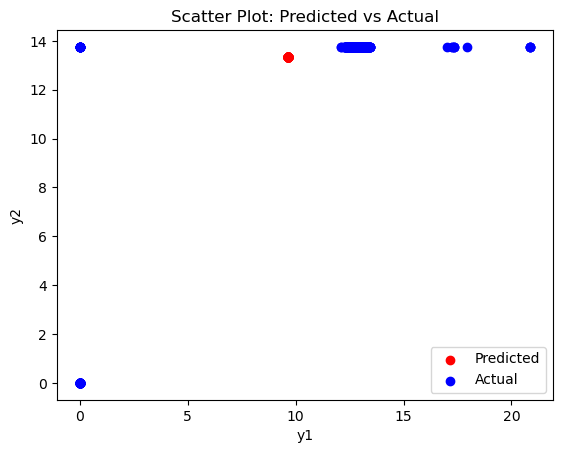

In [24]:
import matplotlib.pyplot as plt

# Assuming you have the actual values for y1 and y2
y1_actual = data['Stage1.Output.Measurement0.U.Actual']
y2_actual = data['Stage1.Output.Measurement0.U.Setpoint']

# Scatter plot of predicted values for y1 and y2
plt.scatter(new_data_pred[0], new_data_pred[1], color='red', label='Predicted')
plt.scatter(y1_actual, y2_actual, color='blue', label='Actual')
plt.xlabel('y1')
plt.ylabel('y2')
plt.legend()
plt.title('Scatter Plot: Predicted vs Actual')
plt.show()


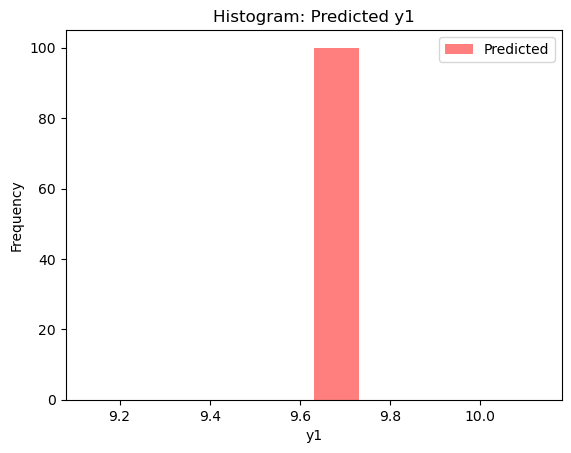

In [25]:
# Histogram of predicted values for y1
plt.hist(new_data_pred[0], bins=10, color='red', alpha=0.5, label='Predicted')
plt.xlabel('y1')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram: Predicted y1')
plt.show()

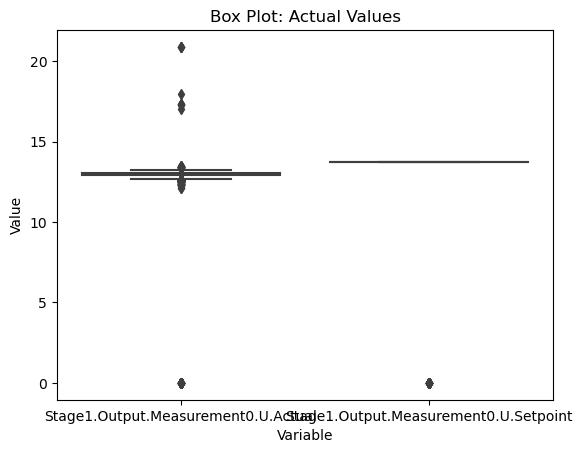

In [26]:
import seaborn as sns

# Box plot of actual values for y1 and y2
sns.boxplot(data=data[['Stage1.Output.Measurement0.U.Actual', 'Stage1.Output.Measurement0.U.Setpoint']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plot: Actual Values')
plt.show()


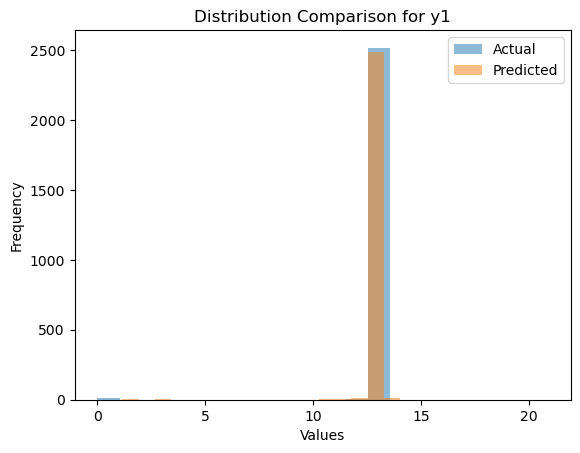

In [27]:
y_test_combined = np.column_stack((y1_test, y2_test, y3_test, y4_test, y5_test))

y_pred_combined = multioutput_regressor.predict(X_test)
y_pred = np.hsplit(y_pred_combined, 5)

plt.hist(y_test_combined[:, 0], bins=20, alpha=0.5, label='Actual')
plt.hist(y_pred[0][:, 0], bins=20, alpha=0.5, label='Predicted')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Comparison for y1')
plt.legend()
plt.show()

In [31]:
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam



In [32]:
pca = PCA(n_components=10)  # Choose the desired number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [33]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5))  # 5 output neurons for the 5 target variables

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
model.fit(X_train_pca, y_train_combined, epochs=100, batch_size=32, verbose=1)

y_pred_nn = model.predict(X_test_pca)


Epoch 1/100
361/361 [==============================] - 1s 2ms/step - loss: 31.1576
Epoch 2/100
361/361 [==============================] - 1s 2ms/step - loss: 2.1900
Epoch 3/100
361/361 [==============================] - 1s 2ms/step - loss: 1.8194
Epoch 4/100
361/361 [==============================] - 1s 2ms/step - loss: 1.6317
Epoch 5/100
361/361 [==============================] - 1s 2ms/step - loss: 1.4924
Epoch 6/100
361/361 [==============================] - 1s 2ms/step - loss: 1.3928
Epoch 7/100
361/361 [==============================] - 1s 2ms/step - loss: 1.3091
Epoch 8/100
361/361 [==============================] - 1s 2ms/step - loss: 1.2378
Epoch 9/100
361/361 [==============================] - 1s 2ms/step - loss: 1.1810
Epoch 10/100
361/361 [==============================] - 1s 2ms/step - loss: 1.1446
Epoch 11/100
361/361 [==============================] - 1s 2ms/step - loss: 1.1052
Epoch 12/100
361/361 [==============================] - 1s 2ms/step - loss: 1.0698
Epoch 13/100

361/361 [==============================] - 1s 2ms/step - loss: 0.3335
Epoch 100/100
80/80 [==============================] - 0s 1ms/step


In [34]:
mse_nn = mean_squared_error(y_test_combined, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test_combined, y_pred_nn)

print("Neural Network Performance:")
print("MSE:", mse_nn)
print("RMSE:", rmse_nn)
print("R-squared:", r2_nn)


Neural Network Performance:
MSE: 0.517007705651186
RMSE: 0.719032478856961
R-squared: 0.5523504335942336


In [35]:
from keras.layers import Dropout


In [36]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dropout(0.2))  # Add dropout regularization with a dropout rate of 0.2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Add dropout regularization with a dropout rate of 0.2
model.add(Dense(5))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
model.fit(X_train_pca, y_train_combined, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
361/361 [==============================] - 1s 2ms/step - loss: 36.2358
Epoch 2/100
361/361 [==============================] - 1s 2ms/step - loss: 6.9877
Epoch 3/100
361/361 [==============================] - 1s 2ms/step - loss: 5.8998
Epoch 4/100
361/361 [==============================] - 1s 2ms/step - loss: 4.9960
Epoch 5/100
361/361 [==============================] - 1s 2ms/step - loss: 4.5162
Epoch 6/100
361/361 [==============================] - 1s 2ms/step - loss: 4.1118
Epoch 7/100
361/361 [==============================] - 1s 2ms/step - loss: 3.6945
Epoch 8/100
361/361 [==============================] - 1s 2ms/step - loss: 3.3898
Epoch 9/100
361/361 [==============================] - 1s 2ms/step - loss: 3.1896
Epoch 10/100
361/361 [==============================] - 1s 2ms/step - loss: 2.9448
Epoch 11/100
361/361 [==============================] - 1s 2ms/step - loss: 2.7616
Epoch 12/100
361/361 [==============================] - 1s 2ms/step - loss: 2.6185
Epoch 13/100

361/361 [==============================] - 1s 2ms/step - loss: 1.0261
Epoch 100/100
361/361 [==============================] - 1s 2ms/step - loss: 1.0001


Epoch 1/100
361/361 [==============================] - 1s 3ms/step - loss: 0.9979 - val_loss: 0.8479
Epoch 2/100
361/361 [==============================] - 1s 2ms/step - loss: 0.9863 - val_loss: 0.8444
Epoch 3/100
361/361 [==============================] - 1s 2ms/step - loss: 0.9547 - val_loss: 0.8314
Epoch 4/100
361/361 [==============================] - 1s 2ms/step - loss: 0.9674 - val_loss: 0.8180
Epoch 5/100
361/361 [==============================] - 1s 2ms/step - loss: 0.9955 - val_loss: 0.7983
Epoch 6/100
361/361 [==============================] - 1s 2ms/step - loss: 0.9644 - val_loss: 0.8529
Epoch 7/100
361/361 [==============================] - 1s 2ms/step - loss: 0.9161 - val_loss: 0.8018
Epoch 8/100
361/361 [==============================] - 1s 2ms/step - loss: 0.9679 - val_loss: 0.8439
Epoch 9/100
361/361 [==============================] - 1s 2ms/step - loss: 0.9801 - val_loss: 0.8167
Epoch 10/100
361/361 [==============================] - 1s 2ms/step - loss: 0.8943 - val_lo

361/361 [==============================] - 1s 2ms/step - loss: 0.6941 - val_loss: 0.8165
Epoch 82/100
361/361 [==============================] - 1s 2ms/step - loss: 0.6476 - val_loss: 0.8552
Epoch 83/100
361/361 [==============================] - 1s 3ms/step - loss: 0.6441 - val_loss: 0.8215
Epoch 84/100
361/361 [==============================] - 1s 3ms/step - loss: 0.6136 - val_loss: 0.8311
Epoch 85/100
361/361 [==============================] - 1s 3ms/step - loss: 0.6694 - val_loss: 0.8849
Epoch 86/100
361/361 [==============================] - 1s 3ms/step - loss: 0.6175 - val_loss: 0.8333
Epoch 87/100
361/361 [==============================] - 1s 2ms/step - loss: 0.7034 - val_loss: 0.8410
Epoch 88/100
361/361 [==============================] - 1s 2ms/step - loss: 0.6532 - val_loss: 0.8499
Epoch 89/100
361/361 [==============================] - 1s 2ms/step - loss: 0.6467 - val_loss: 0.8032
Epoch 90/100
361/361 [==============================] - 1s 2ms/step - loss: 0.6074 - val_loss: 

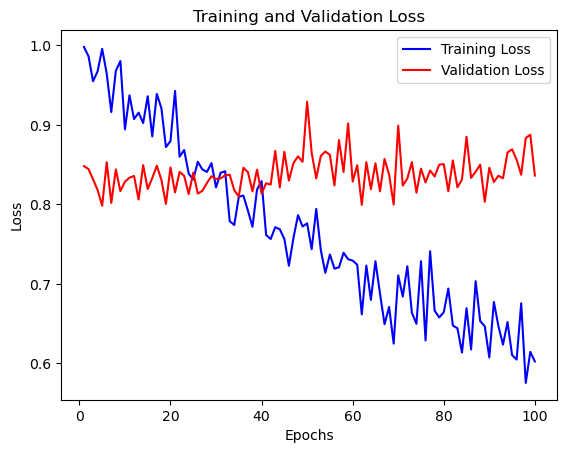

In [37]:
import matplotlib.pyplot as plt

# Train the model and obtain the history object
history = model.fit(X_train_pca, y_train_combined, epochs=100, batch_size=32, validation_data=(X_test_pca, y_test_combined), verbose=1)

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss curves
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [43]:
from sklearn.metrics import mean_squared_error, r2_score


In [44]:
mse = mean_squared_error(y_test_combined, y_pred_nn)
rmse = np.sqrt(mse)


In [45]:
r2 = r2_score(y_test_combined, y_pred_nn)


In [46]:
print("Evaluation Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


Evaluation Metrics:
MSE: 0.7355053292162477
RMSE: 0.8576160733196689
R-squared: 0.3656877025443027
